# Seaborn and Pandas

In this notebook we will introduce you to the library Seaborn. Seaborn is a library that is built on top of Matplotlib, and enables you to effectively and conveniently generate aesthetically pleasing graphs from data that is stored in Pandas DataFrames. We will first show you how to use Seaborn, and then quickly move on to an exercise in which you will explore and visualise the properties of a dataset.

## What is Seaborn and how does it work?

Seaborn is a library for making statistical graphs in Python. As mentioned above, it is built on top of Matplotlib and highly customizable using the same Matplotlib functions you already know. Seaborn is usually imported as:

```python
    import seaborn as sns
```   
 
In the cells below, we will give you an example of what Seaborn can do:

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load an example dataset from the internet
tips = sns.load_dataset("tips")

# Tips is an ordinary pandas DataFrame, so we can display it
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


To make testing and explaining Seaborn's built-in ways to visualize data easier, Seaborn has an integrated function that can download an example dataset from the internet:

```python
# Load an example dataset from the internet
tips = sns.load_dataset("tips")
```

You will often see this function being used in online examples. There’s nothing special about these datasets: they are just pandas dataframes, and we could have loaded them with `pd.read_csv()` or built them by hand.

This particular dataset holds data of parties of restaurant visitors, which we will use throughout our examples. It includes data on:

- `total_bill`: the total bill in dollars
- `tip`: the tip in dollars
- `sex`: the sex of the bill payer
- `smoker`: whether there were smokers in the party
- `day`: day of the week in short notation
- `time`: time of day (lunch or dinner)
- `size`: number of persons in the party

Using Seaborn's `relplot()`, we can easily show the relationship between multiple variables:

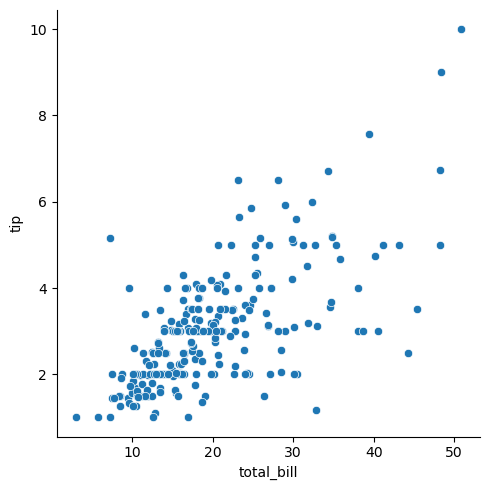

In [8]:
# Create a simple graph comparing the total bill to the tip size
sns.relplot(
    data=tips,
    x="total_bill", 
    y="tip"
)

# Show the resulting plot!
plt.show()

Notice how we provided only the names of the variables and their roles in the plot:
- First, we tell `relplot()` to use our DataFrame `tips` as it datasource.
- The horizontal axis (`x`) is told to use the column `"total_bill"`
- The vertical axis (`y`) is told to use the column `"tip"`

Unlike when using matplotlib directly, it wasn’t necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands.

We can even easily separate different classes in the data visually by adding different arguments to the call to `relplot()`:

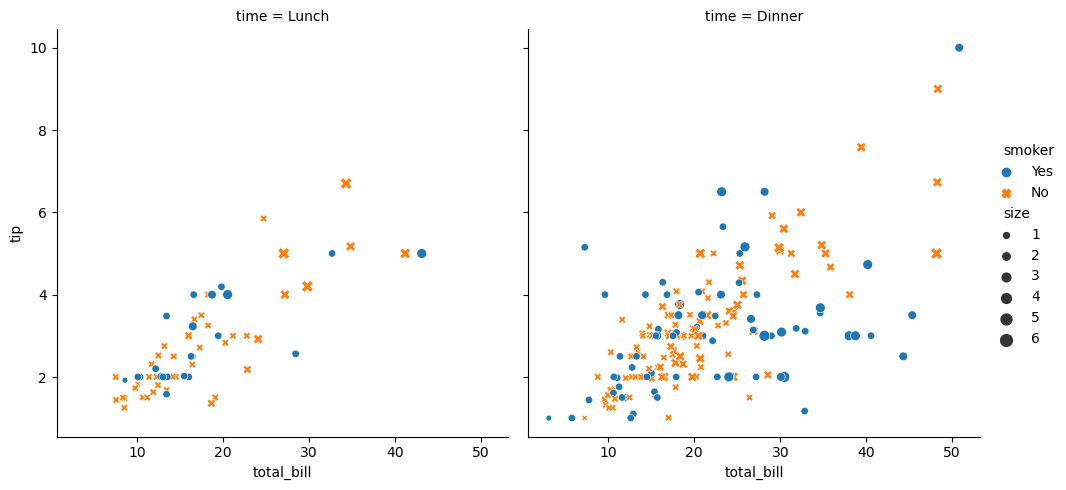

In [22]:
sns.relplot(
    data=tips,
    x="total_bill", 
    y="tip", 
    hue="smoker", 
    style="smoker", 
    size="size",
    col="time"
)

plt.show()

In the code above:
- `hue="smoker"`: sets the colour of each datapoint to be dependant on the value in the column `"smoker"`. Since the `"smoker"` column only has two possible nominal values ("Yes" or "No"), the datapoints each get assigned either blue or orange. When there are more than a couple different possible values and values are numerical, Seaborn will automatically opt for a colour that increases in darkness as the value increases. Ranging from white for low values, black at high values, and purple for values in between. You can try this yourself by replacing the assigned `hue` column with `"size"`.
- `style="smoker"`: sets the column `"smoker"` as the grouping variable that will produce datapoints with different styles/glyphs. In this specific case "Yes" is automatically set to a circle, while "No" is set to a cross.
- `size="size"`: sets the size of each glyph representing a datapoint to the value defined in the column `"size"`.
- `col="time"`: defines that for each category in the column `"time"` there should be a subplot with only data for that specific category. Each subplot is positioned _columnwise_ next to the last, with its own title. You can also use `row="time"` to plot each subplot vertically!

`relplot()` has many of these keyword arguments, which can all be found in the [seaborn documentation for `relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html). If you scroll down, you will even find many different examples that use different keyword arguments!

## Other types of plots

Of course there are many more types (and subtypes) of plots that can be used to display your data. We will give a couple examples below, but for a quick overview of the types of graphs that Seaborn can create, take a look at their [example gallery](https://seaborn.pydata.org/examples/index.html).

### Statistical estimation

Often, we are interested in the average value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions. 

For our next example we will use the `"fmri"` dataset. This dataset holds information of measurements (signal strength) of different regions of the brain following a specific event. The datapoints are temporal, meaning that they are a measurement over time, and there are many datapoints for different subjects (patients). 

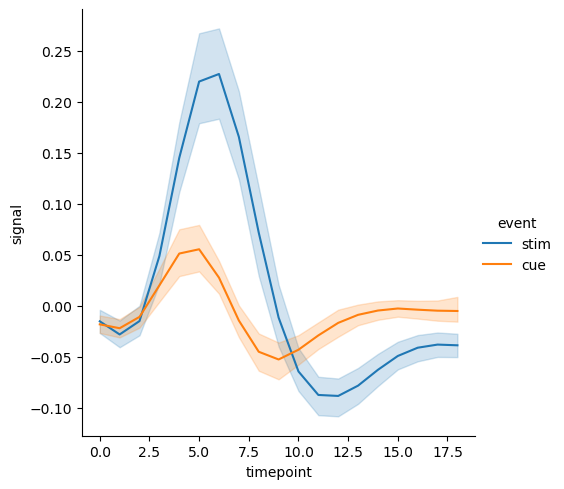

In [32]:
fmri = sns.load_dataset("fmri")

sns.relplot(
    data=fmri, 
    kind="line",
    x="timepoint", 
    y="signal", 
    hue="event"
)

plt.show()

By setting `kind="line"`, thus asking for a line, and setting the horizontal axis to a column holding numerical values, Seaborn automatically assumes that it should average data over all subjects for each timepoint. It even computes confidence intervals and draws error bars representing the uncertainty. There is no need for grouping values yourself! 

It is even possible to estimate trends (and their uncertainty) using a linear regression model using `lmplot()`:

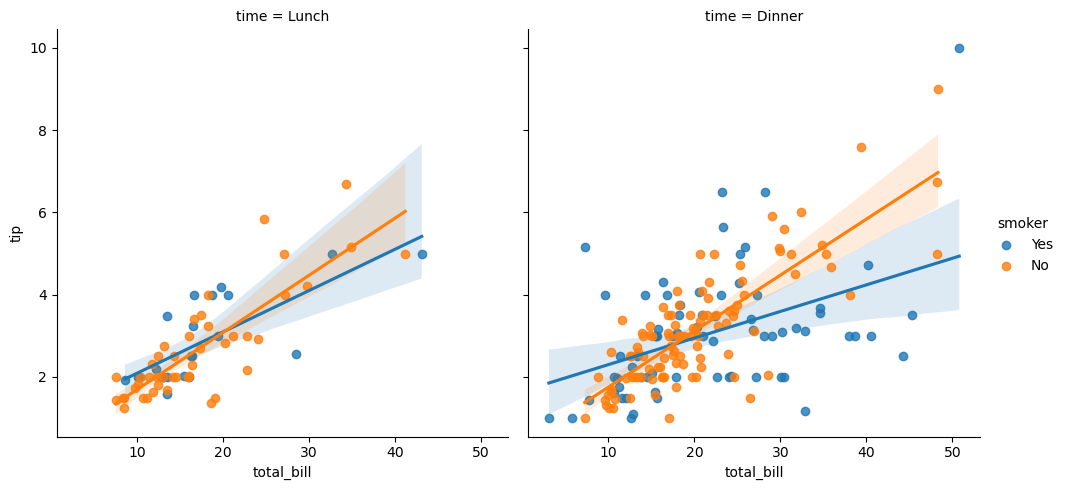

In [33]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
plt.show()

Showing that in our tips dataset parties containing a smoker generally tip less during dinnertime when the bill is higher. Although we could argue that we do not have sufficient data, because there is a high uncertainty. 

We can also analyse and estimate the distributions of the data:

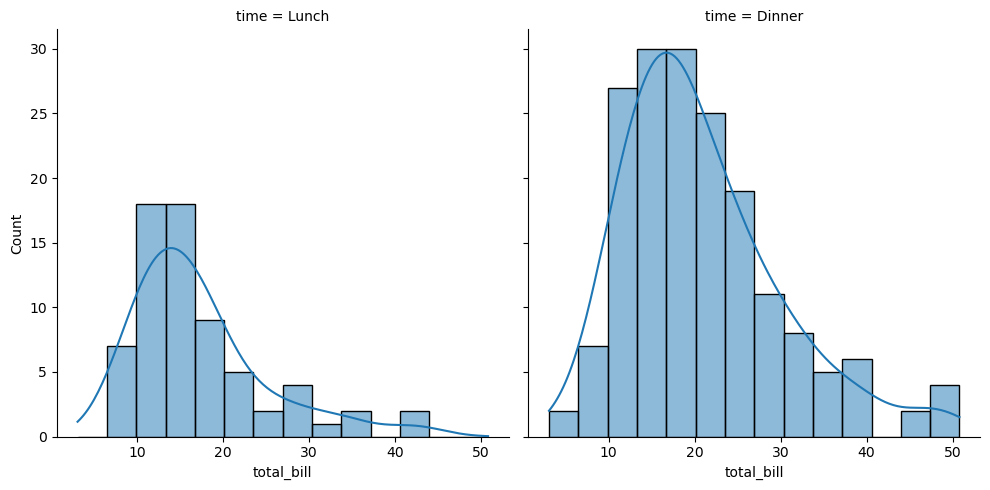

In [36]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)
plt.show()

### Plotting categorical data

Seaborn also offers several specialized plots for categorical data. All these plots can be generated by using `catplot()`.

Again, using our tips dataset, we can use this function to show the mean tip for smokers and non-smokers and its confidence interval for every day of the week:

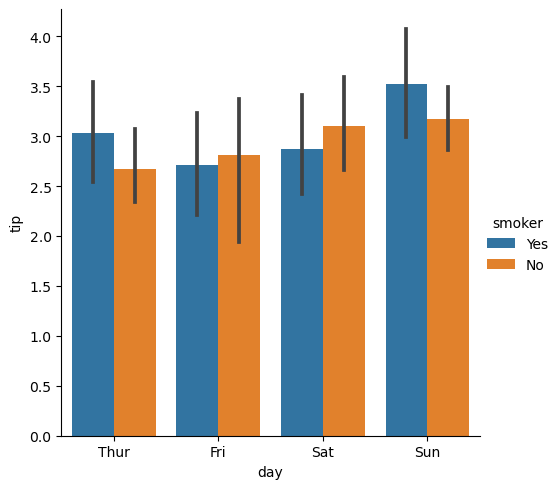

In [42]:
sns.catplot(data=tips, kind="bar", x="day", y="tip", hue="smoker")
plt.show()

Try the code above, but replace `kind="bar"` with `"swarm"` or `"violin"` to see every observation or a distribution density estimation respectively!

# Mushrooms

For this exercise we're going to work with a dataset on mushrooms. More information on the dataset, take a look at [the webpage of the original study that is the source of this dataset](http://archive.ics.uci.edu/ml/datasets/Mushroom).  Again, the data is included into the package of this exercise; read the data from `'data/mushrooms.csv'` into a Pandas `DataFrame`.

The dataset contains an annotated collection of edible and poisonous mushrooms. The ediblity is related to many other properties, like the odor of the mushroom, the cap shape, the cap color, etc.

This exercise requires a bit more creativity than before. It is up to you to figure out how to go about answering the following questions.

### Exercise

- Download and explore the dataset. Using Seaborn, generate a graph that shows the relation between *cap shape* and *edibility*. This graph should at least give an answer to the following questions: Is a mushroom with a bell shape more often poisonous or edible? What about a mushroom that is knobbed?

To aid you in understanding the dataset, we've already included some code that will make the dataframe more readable. 

In [ ]:
nested_value_dict = {'class': {'p': 'poisonous', 'e': 'edible'}
     , 'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
     , 'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
     , 'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'bruises': {'t': 'bruises', 'f': 'no'}
     , 'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
     , 'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
     , 'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'}
     , 'gill-size': {'b': 'broad', 'n': 'narrow'}
     , 'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'stalk-shape': {'e': 'enlarging', 't': 'tapering'}
     , 'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
     , 'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
     , 'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
     , 'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'veil-type': {'p': 'partial', 'u': 'universal'}, 'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
     , 'ring-number': {'n': 'none', 'o': 'one', 't': 'two'}
     , 'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
     , 'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
     , 'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
     , 'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}}

df_mushroom = pd.read_csv('data/mushrooms.csv')
df_mushroom = df_mushroom.replace(nested_value_dict)

### YOUR CODE HERE


Let's say you want to give a friend some advice on picking mushrooms. You would like this friend to live so you have to find a description that garantees the mushroom to be edible. For example, all mushrooms with a sunken cap shape are edible.

The problem with that description is that there are very few mushrooms that fit it.

### Exercise
- Find a description that describes as many edible mushrooms as possible without also describing poisonous mushrooms.

**HINT:** Besides cap shape, there are other properties of mushrooms that have unique values that can only occur within edible (or inedible) mushrooms. Maybe we can even make combinations of properties of which we know that mushrooms that have or don't have those properties must be edible.

Note that there is not a single correct answer. The answer depends on how complex you allow the description to be. It is up to you to make a sensible and *reasonable* choice here. We are more interested in the way you get to an answer than the answer itself, so **include graphs, comments, and markdown cells that explain your choices**.

> Hopefully needless to say, but **don't try out this strategy for finding edible mushrooms in real life!**